In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from package_global_functions import *

In [4]:
def cross_inh_tanh(x,a,b=1/2,c=0):
    # return 1/2*(np.tanh(a*(x-b+c))/np.tanh(a*(b+c))+1)
    return 1/2*(np.tanh(a*(x-b))/np.tanh(a*b/c)+1)

def cross_inh_arctan(x,a,b=1/2):
    return 1/2*(np.arctan(a*(x-b))/np.arctan(a*b) + 1)

def cross_in_func(pop,*kwargs):
    # kwargs 
    # first: linear, sigmoid 1 or 2...
    # second: x0
    # third: a
    # fouth: make superior part of the sigmoid linear (True) or not
    if not kwargs or kwargs[0] == 0 or kwargs[0] == 'lin':
        return pop
    elif kwargs[0] == 1 or kwargs[0] == 'sigmoid1':
        x0, a = kwargs[1], kwargs[2]
        cival = 1/(1+np.exp(-a*(pop-x0))) 
        if len(kwargs) == 4 and kwargs[3]:
            cival = min(cival, pop)
        return cival
    elif kwargs[0] == 2 or kwargs[0] == 'sigmoid2':
        x0, a = kwargs[1], kwargs[2]
        return pop/(1+np.exp(-a*(pop-x0)))

In [22]:
b = 0.6
inf = cross_inh_tanh(0.0, 20, b=b)
sup = cross_inh_tanh(1.0, 20, b=b)
print(inf, sup)

0.0 0.9999998875025893


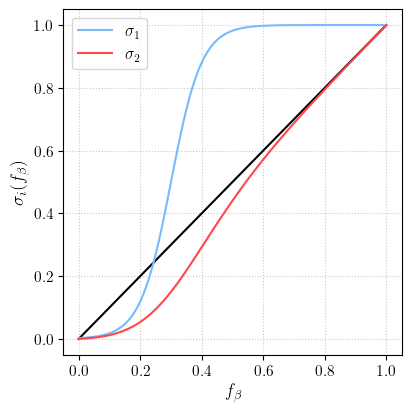

In [14]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)

# plot the sigmoid functions used:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
# ax.set(ylabel='Cross Inhibition Strenght', xlabel='Inhibiting population')
ax.set(ylabel=r'$\sigma_i ( f_\beta )$', xlabel=r'$f_\beta$')
ax.grid(color='xkcd:gray', ls=':', alpha=0.5)
xs = np.arange(0.0, 1.01, 0.01)

ci_kwargs_list = [(0,), (1, 0.3, 20.0), (2, 0.3, 10.0), (1, 0.3, 500.0), (2, 0.3, 500.0)]
color_seq = ['k', 'xkcd:sky blue', 'xkcd:light red', 'xkcd:bright blue', 'xkcd:deep red']
labels = ['_nolabel_', r'$\sigma_1$', r'$\sigma_2$', 'aaa', 'bbb']

for ci_kwargs,color,label in zip(ci_kwargs_list[0:3],color_seq[0:3],labels[0:3]):
    civals = cross_in_func(xs, *ci_kwargs)
    ax.plot(xs, civals, color=color, label=label)
# ax.legend(frameon=False)
ax.legend()

fig.savefig('cimods_smooth.pdf')